In [40]:
import pandas as pd
import numpy as np

import warnings
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [41]:
analysis = pd.read_csv("/Users/giacomorossini/Desktop/IRONHACK/Class/LAB3/lab-customer-analysis-round-3/files_for_lab/csv_files/marketing_customer_analysis.csv")

cols=[]
for i in range(len(analysis.columns)):
    cols.append(analysis.columns[i].lower().replace(' ','_'))
    
analysis.columns=cols


analysis 

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [42]:
analysis.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [43]:
analysis.shape

(9134, 24)

In [44]:
analysis.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [45]:
analysis['response']=analysis['response'].fillna('No')
analysis

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


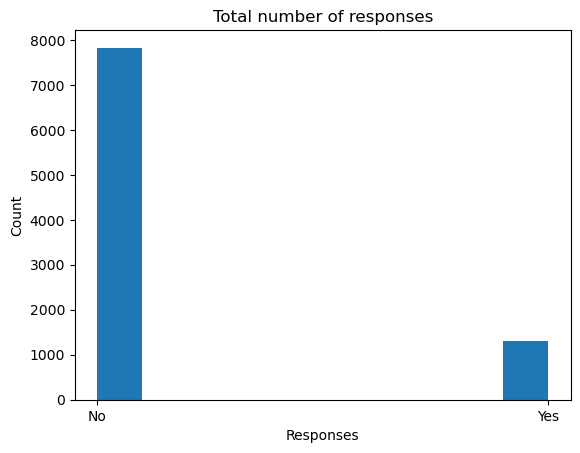

In [46]:
plt.hist(analysis['response'], rwidth=1)

plt.xlabel('Responses')
plt.ylabel('Count')
plt.title('Total number of responses')

plt.show()

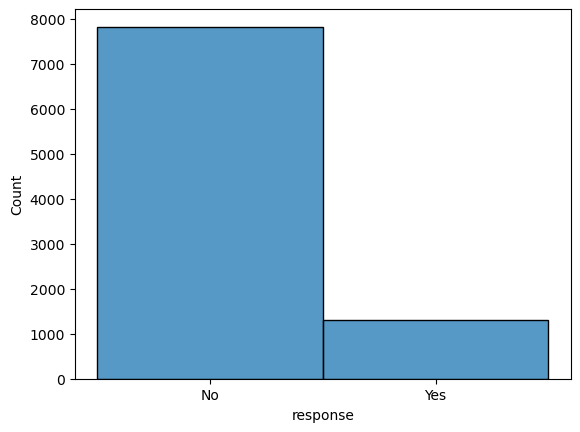

In [47]:
sns.histplot(analysis['response'])
plt.show()

In [48]:
'''
!!!!first hypothesis based on a new column

#get %of yes & no --> column displaying yes
analysis ['response_count'] = np.where(analysis ['response']=='Yes', 1, 0)
#variable counting the yes based on a condition
count_yes = sum(1 for i in  analysis['response_count']if i ==1)
count_no = sum(1 for i in  analysis['response_count']if i ==0)
count_tot=count_yes+count_no
#adding a coulmn yes/no based
analysis['count_perc_yes']=analysis['response_count']/count_tot
analysis['count_perc_no']=count_no/count_tot
analysis
'''

"\n!!!!first hypothesis based on a new column\n\n#get %of yes & no --> column displaying yes\nanalysis ['response_count'] = np.where(analysis ['response']=='Yes', 1, 0)\n#variable counting the yes based on a condition\ncount_yes = sum(1 for i in  analysis['response_count']if i ==1)\ncount_no = sum(1 for i in  analysis['response_count']if i ==0)\ncount_tot=count_yes+count_no\n#adding a coulmn yes/no based\nanalysis['count_perc_yes']=analysis['response_count']/count_tot\nanalysis['count_perc_no']=count_no/count_tot\nanalysis\n"

In [49]:
#grouping yes by sales
'''
analysis['count_perc_yes'].groupby(analysis['sales_channel']).sum()
'''

"\nanalysis['count_perc_yes'].groupby(analysis['sales_channel']).sum()\n"

In [50]:
#+Carol input

grouped = analysis.groupby('sales_channel')['response'].value_counts(normalize=True).unstack().fillna(0)
grouped

response,No,Yes
sales_channel,,
Agent,0.808456,0.191544
Branch,0.885469,0.114531
Call Center,0.891218,0.108782
Web,0.882264,0.117736


In [51]:
grouped['response_rate'] = grouped['Yes'] * 100
grouped

response,No,Yes,response_rate
sales_channel,,,
Agent,0.808456,0.191544,19.154443
Branch,0.885469,0.114531,11.453058
Call Center,0.891218,0.108782,10.878187
Web,0.882264,0.117736,11.773585


In [52]:
grouped.reset_index(inplace=True)
grouped

response,sales_channel,No,Yes,response_rate
0,Agent,0.808456,0.191544,19.154443
1,Branch,0.885469,0.114531,11.453058
2,Call Center,0.891218,0.108782,10.878187
3,Web,0.882264,0.117736,11.773585


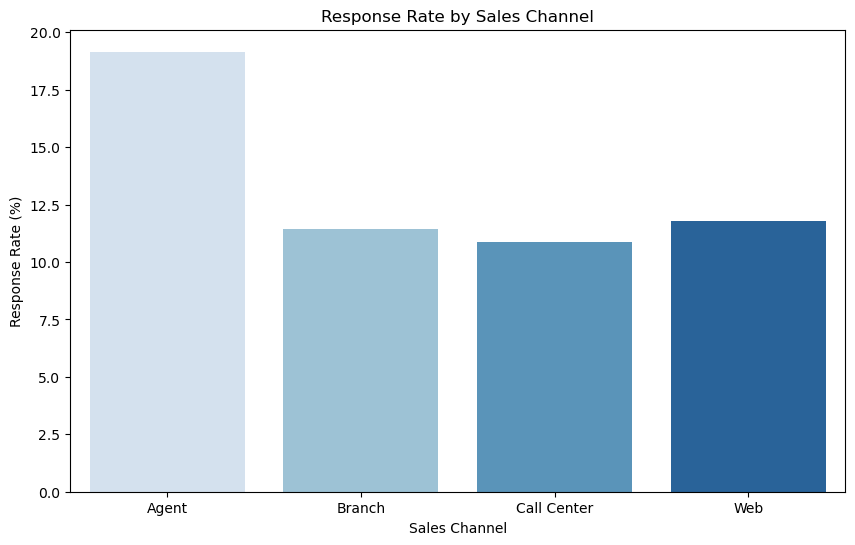

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_channel', y='response_rate', data=grouped, palette="Blues")

# Set labels and title
plt.xlabel("Sales Channel")
plt.ylabel("Response Rate (%)")
plt.title("Response Rate by Sales Channel")

# Show the plot
plt.show()

In [54]:
#count_yes_claim = sum( analysis['total_claim_amount'] for i in  analysis['response']if i ==1)
#count_yes_claim

0

In [68]:
#Starting plotting response rate by the total claim amount
analysis['total_claim_amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64

In [57]:
#adding column to categorize the income -->divided in 4 categories

analysis['claim_category']= np.where(analysis['total_claim_amount']<100, '0-100', np.where(analysis['total_claim_amount']<200,'100-200', np.where(analysis['total_claim_amount']<300,'200-300','>300')))                                                              
analysis

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,claim_category
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,>300
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,>300
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,>300
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,>300
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,100-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,100-200
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,>300
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,>300
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,>300


In [58]:
#inputting in a dataframe for plotting
grouped2= analysis.groupby('claim_category')['response'].value_counts(normalize=True).unstack().fillna(0)
grouped2.reset_index(inplace=True)
grouped2

response,claim_category,No,Yes
0,0-100,0.905192,0.094808
1,100-200,0.912621,0.087379
2,200-300,0.897693,0.102307
3,>300,0.836627,0.163373


In [59]:
#adding response rate for calulation
grouped2['response_rate'] = grouped2['Yes'] * 100
grouped2

response,claim_category,No,Yes,response_rate
0,0-100,0.905192,0.094808,9.480813
1,100-200,0.912621,0.087379,8.737864
2,200-300,0.897693,0.102307,10.230692
3,>300,0.836627,0.163373,16.337327


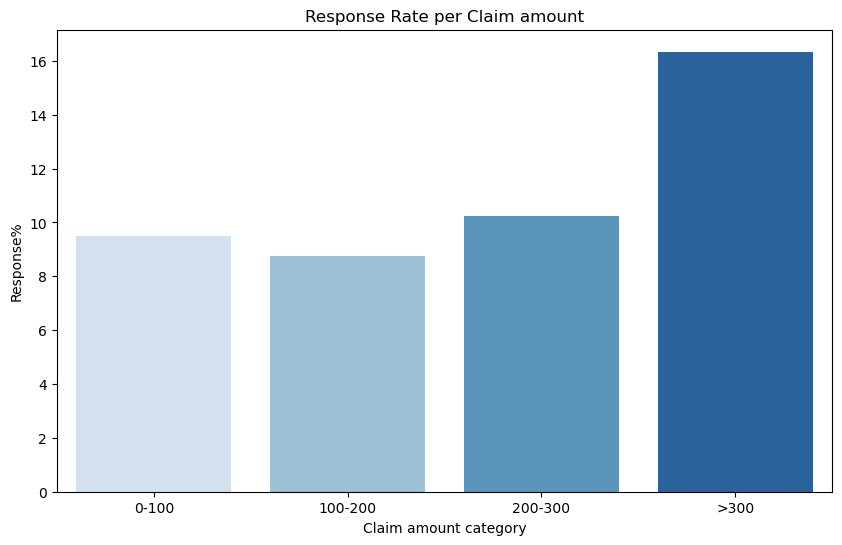

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='claim_category', y='response_rate', data=grouped2, palette="Blues")

# Set labels and title
plt.xlabel("Claim amount category")
plt.ylabel("Response%")
plt.title("Response Rate per Claim amount")

plt.show()

In [66]:
analysis['income'].describe()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: income, dtype: float64

In [69]:
#Starting lot of the response rate by income
analysis['income_category']= np.where(analysis['income']<30000, '0-3000', np.where(analysis['income']<60000,'30000-60000', np.where(analysis['income']<90000,'60000-90000','>90000')))                                                              
analysis

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,claim_category,income_category
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,>300,30000-60000
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,>300,0-3000
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,>300,30000-60000
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,>300,0-3000
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,100-200,30000-60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,100-200,60000-90000
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,>300,0-3000
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,>300,0-3000
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,>300,0-3000


In [70]:
grouped3= analysis.groupby('income_category')['response'].value_counts(normalize=True).unstack().fillna(0)
grouped3.reset_index(inplace=True)
grouped3['response_rate'] = grouped3['Yes'] * 100
grouped3

response,income_category,No,Yes,response_rate
0,0-3000,0.847867,0.152133,15.213270
1,30000-60000,0.869297,0.130703,13.070284
2,60000-90000,0.856144,0.143856,14.385614
3,>90000,0.874739,0.125261,12.526096


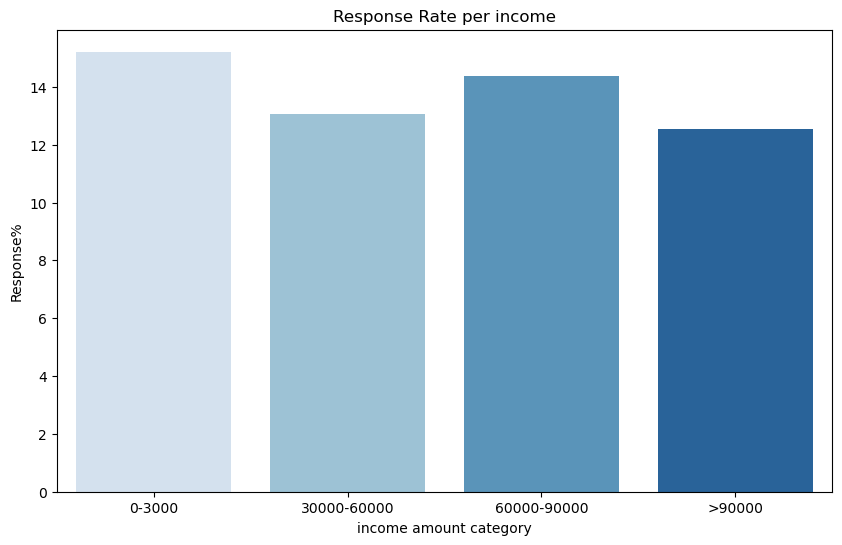

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='income_category', y='response_rate', data=grouped3, palette="Blues")

# Set labels and title
plt.xlabel("income amount category")
plt.ylabel("Response%")
plt.title("Response Rate per income")

plt.show()